In [36]:
import plotly.graph_objects as go
import json
import networkx as nx

lm_file = "les_miserables.json"

with open(lm_file, 'r') as j:
     contents = json.loads(j.read())

In [37]:
nodes = contents["nodes"]
edges = contents["links"]

labels = dict()
G = nx.Graph()
for node in nodes:
    G.add_node(node["id"], name=node["name"])
    labels[node["id"]] = node["name"]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


In [38]:
for edge in edges:
    G.add_edge(edge["source"], edge["target"], weight=edge["value"])

(-0.241859231123418,
 0.2463810935865692,
 -1.0654472235853063,
 0.3743916952914342)

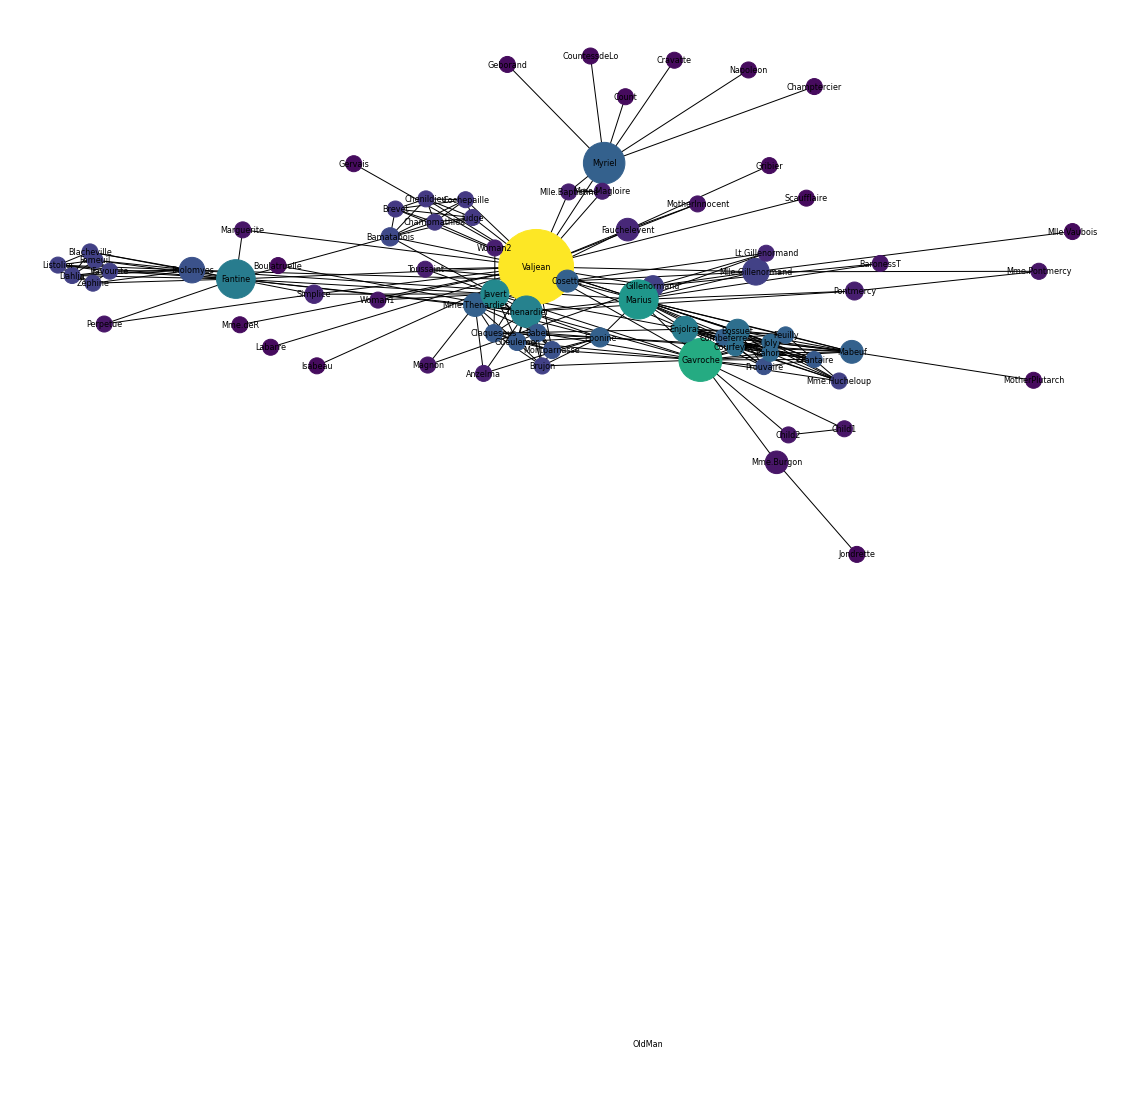

In [48]:
import matplotlib. pyplot as plt

pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, labels=labels, font_size=8)
plt.axis('off')